### THE SPARKS FOUNDATION
#### TASK 1
#### SIMPLER LINEAR REGRESSION
#### NAME- MOBARK AHMED
#### OBJECTIVE:To Predict the percentage of an student based on the no. of study hours. using Python Scikit-Learn library (Simple Linear Regression).
#### IMPORTING LIBRARIES AND DATA

In [2]:
import pandas as pd  
import numpy as np  

import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline

import statsmodels.api as sm 
from statsmodels.stats import diagnostic as diag 
from sklearn.model_selection import train_test_split 

In [4]:
# Importing data using url
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Identify & Treatment of Outlier

<AxesSubplot:ylabel='Hours'>

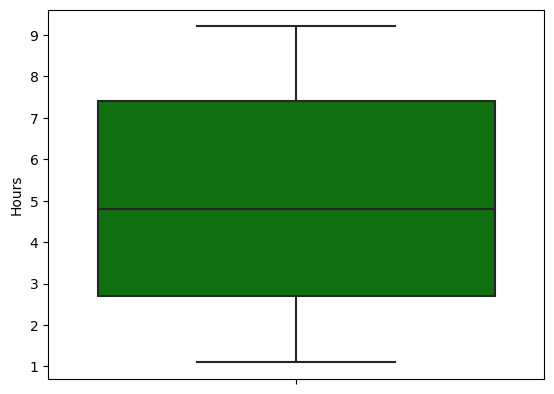

In [10]:
sns.boxplot(y='Hours',data=data,color='green')

<AxesSubplot:ylabel='Scores'>

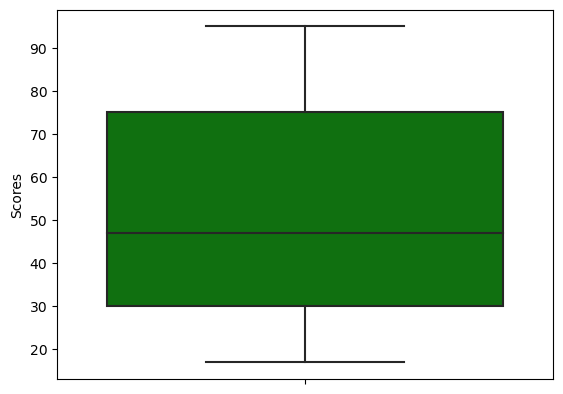

In [11]:
sns.boxplot(y='Scores',data=data,color='green')

### Missing Value

In [12]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

### Correlation Matrix

In [13]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


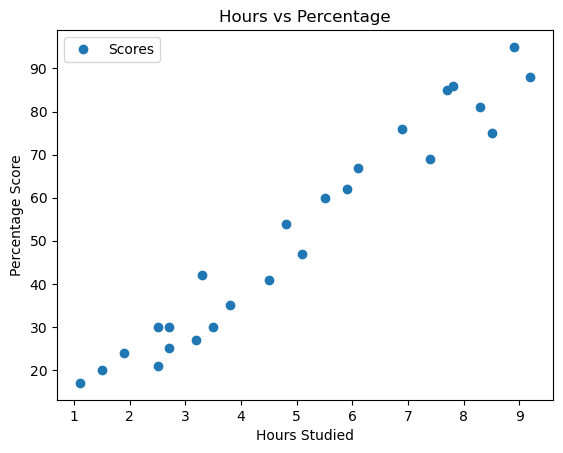

In [14]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Data Partition

In [17]:
x=data[['Hours']]
y=data[['Scores']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [18]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,Hours,Scores
6,9.2,88
12,4.5,41
4,3.5,30
24,7.8,86
0,2.5,21


### MACHINE LEARNING MODEL BUILDING

In [20]:
import statsmodels.formula.api as smf
model = smf.ols('Scores ~ Hours', data=train).fit()

In [21]:
model.summary()

/Users/mobarkahmedyousofhamid/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           1.15e-11
Time:                        20:49:32   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
#### We Reject Ho
#### There is relationship between the Score & Hours studied
#### Accuracy of Model is 95.7%, So Model is Good Fit
#### Y = 1.4951 + 9.8717 * Hours

In [23]:
train['predicted_value']=model.fittedvalues
train['error']=model.resid  

train.head()

,Hours,Scores,predicted_value,error
6,9.2,88,92.314915,-4.314915
12,4.5,41,45.917857,-4.917857
4,3.5,30,36.046143,-6.046143
24,7.8,86,78.494515,7.505485
0,2.5,21,26.174428,-5.174428


### Prediction on Test Data 

In [24]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Hours,Scores
9,2.7,25
22,3.8,35
13,3.3,42
11,5.9,62
5,1.5,20


In [25]:
test['Predicted']=model.predict(test)
test

,Hours,Scores,Predicted
9,2.7,25,28.148771
22,3.8,35,39.007657
13,3.3,42,34.071800
11,5.9,62,59.738257
5,1.5,20,16.302714
19,7.4,69,74.545829
23,6.9,76,69.609972
21,4.8,54,48.879371


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [35]:
d1 = {'student':pd.Series(['student1']),
     'Hours':pd.Series([9.25])}
result = pd.DataFrame(d1)
result

,student,Hours
0,student1,9.25


In [36]:
result['Predicated Score']=np.round(model.predict(live))
result

,student,Hours,Predicated Score
0,student1,9.25,93.0
